
# MSS482 - GRAPHING TECHNOLOGY IN MATHEMATICS AND SCIENCE

**SEMESTER 1 2023/2024**


>R.U.Gobithaasan (2023). School of Mathematical Sciences, Universiti Sains Malaysia.
[Official Website](https://math.usm.my/academic-profile/705-gobithaasan-rudrusamy) 


<p align="center">
     © 2023 R.U. Gobithaasan All Rights Reserved.
</p>

# Scatterplots, Linear & Multiple Regression. 
- https://www.pythonfordatascience.org/linear-regression-python/

4.1 Scatterplot <br>

4.2. Linear Regression <br>

4.3 Multiple Regression <br>

4.3 Using Seaborn for Regression Visualization <br>







### requirements

> Install the following: `!python -m pip install pandas`
1. pandas
2. researchpy
3. statsmodels
4. matplotlib
5. seaborn

### Dataset: Online Dataset sources

**Online Sources:** 
- Google Dataset Search: https://datasetsearch.research.google.com/ 
- Kaggle: https://www.kaggle.com/datasets 
- UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php 
- Earth Data: https://www.earthdata.nasa.gov/
- Scikit Dataset: https://scikit-learn.org/stable/datasets.html
- https://github.com/gob1thaasan/Data-sets 


### Tips

In [1]:
# Magic command to display Matplotlib plots inline :https://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline
# To ignore warnings, use the following code to make the display more attractive.
# Import seaborn and matplotlib.
import warnings
warnings.filterwarnings("ignore")

# Scatter plot: a part of data visualization
- https://www.kaggle.com/code/benhamner/python-data-visualizations

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


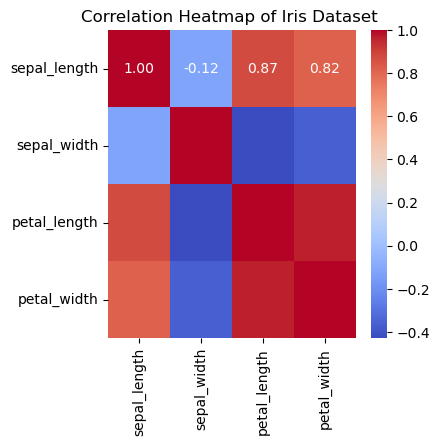

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("../data/iris.csv")

# Selecting only numeric columns for correlation calculation
feature_columns = iris.drop(['species', 'species_id'], axis=1)

# Calculating the correlation matrix
corr_matrix = feature_columns.corr()
print(corr_matrix)

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap of Iris Dataset ')
plt.show()

>Let's see how many instances we have of each species


In [3]:
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

> The most correlated features

<Axes: xlabel='petal_length', ylabel='petal_width'>

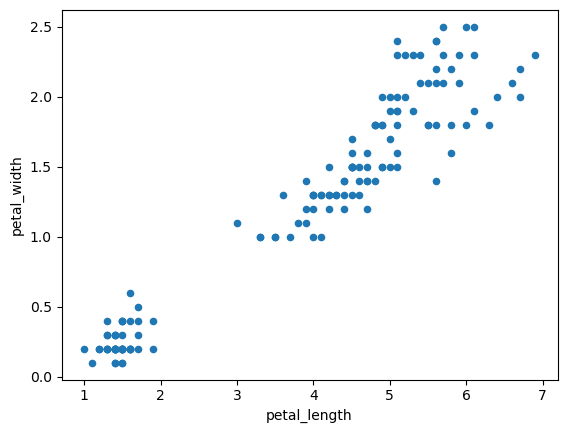

In [4]:
iris.plot(kind="scatter", x="petal_length", y="petal_width")

A FacetGrid is a multi-axes grid with subplots visualizing the distribution of variables of a dataset and the relationship between multiple variables.
- https://seaborn.pydata.org/generated/seaborn.FacetGrid.html 
- The first line initializes the grid and color based on the species, but doesn’t plot anything on it.
- the `map` function plots two features in the grid space.

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


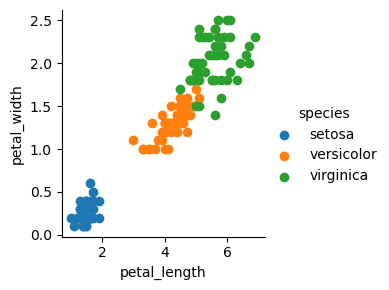

In [6]:
sns.FacetGrid(iris, hue="species").\
    map(plt.scatter, "petal_length", "petal_width").\
        add_legend()

>The least correlated features

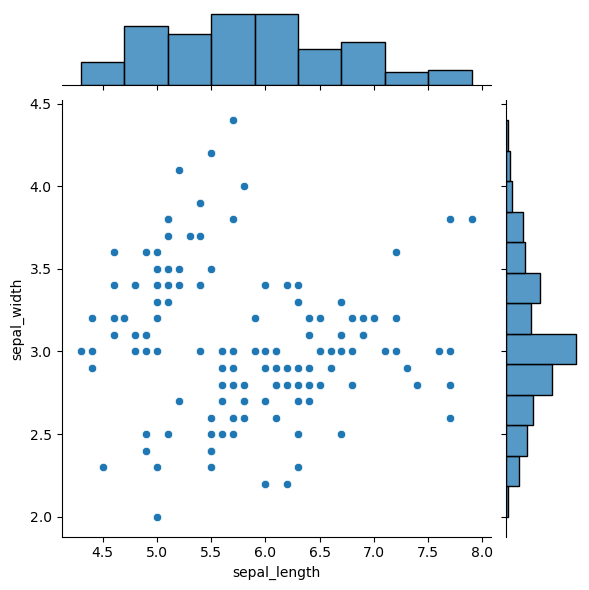

In [7]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

> Let's investigate further the distribution of linearly correlated features visually

<Axes: xlabel='species', ylabel='petal_length'>

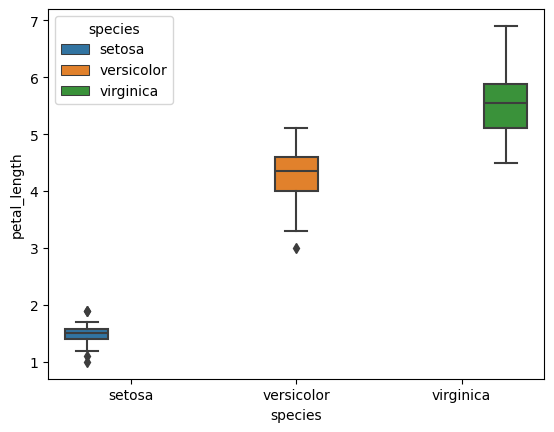

In [8]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="petal_length", data=iris, hue="species")


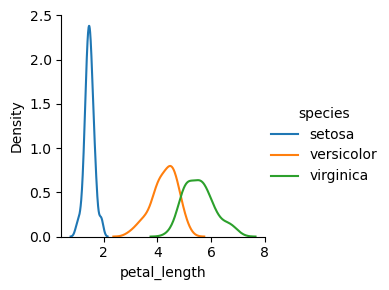

In [9]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="species").map(sns.kdeplot, "petal_length").add_legend()

>A violin plot combines boxplot and its distribution curves.
- Denser regions of the data are fatter, and sparser thinner in a violin plot.

<Axes: xlabel='species', ylabel='petal_length'>

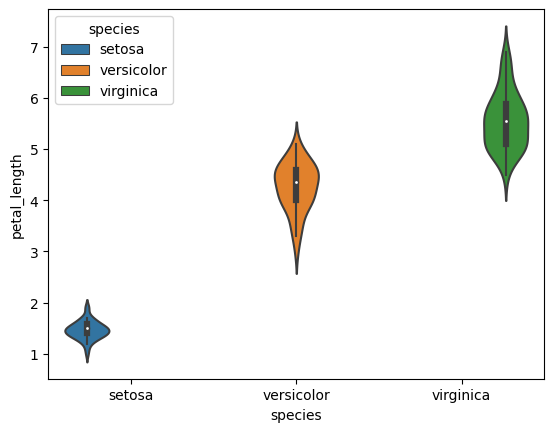

In [10]:
sns.violinplot(x="species", y="petal_length", data=iris, hue="species" )

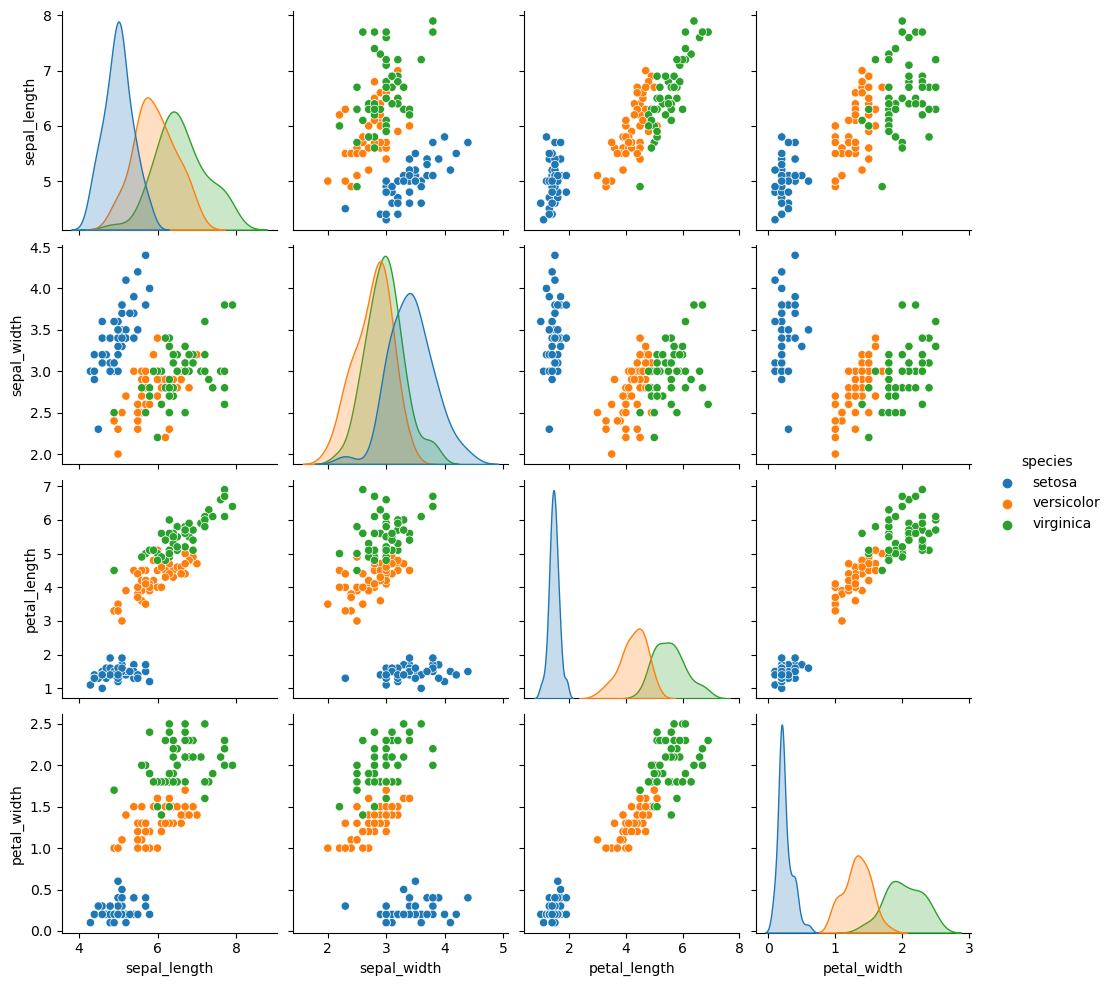

In [11]:
sns.pairplot(iris.drop(['species_id'], axis=1), hue="species")

> scatterplot in 3D

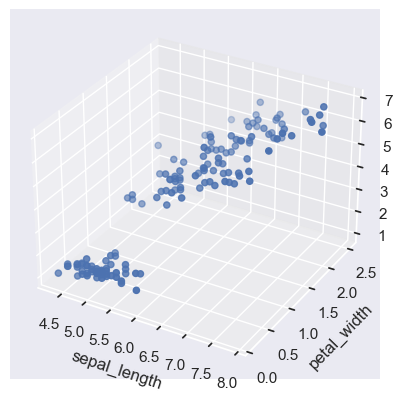

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = iris['sepal_length']
y = iris['petal_width']
z = iris['petal_length']

ax.set_xlabel("sepal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("petal_length")

ax.scatter(x, y, z,)
plt.show()

> install the following
- `python -m pip install plotly`
- `python -m pip install nbformat`
- `python -m pip install ipykernel`

In [13]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length',  y='petal_length', z='petal_width',color='species')
fig.show()

---
# Linear Regression

**Linear regression is a fundamental statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (predictors) by fitting a linear equation to observed data**. 

- It assumes that there is a linear relationship between the variables and aims to find the best-fitting straight line that describes the relationship.

The equation of a simple linear regression with one independent variable can be represented as:

$ y = mx + c $

Where:
- $ y $ is the dependent variable (the variable we want to predict). Alsk called as response variable.
- $ x $ is the independent variable or known as the predictor (the variable used to make predictions).
- $ m $ is the slope of the line (the effect of $ x $ on $ y $).
- $ c $ is the y-intercept (the value of $ y $ when $ x $ is 0).

> In statistics, we usually denote linear regression model as: $ y = \beta_0 + \beta_1 x $

The goal of linear regression is to find the values of $ m $ and $ c $ that minimize the difference between the predicted values and the actual values in the dataset. This is often done using a method called the least squares method, which minimizes the sum of the squared differences between the observed and predicted values.


Linear regression is widely used for various purposes, including prediction, forecasting, and understanding the relationship between variables in many fields such as economics, finance, biology, and social sciences.


We can carry regression analysis with two types of packages in Python:

1. `statsmodels`: is more focused on statistical inference, detailed analysis, and hypothesis testing, providing statistical summaries.
2. `scikit-learn`: geared towards predictive modeling, offering a broader range of machine learning algorithms and evaluation metrics.

The choice between them depends on the specific requirements of your analysis—whether you need detailed statistical insights or are focused on predictive performance and machine learning tasks.

> this is a controlled experiment with know coeeficients; $\beta_0 = 3$ and $\beta_1 = 4$, hence

$y = 3 + 4 * X$

### ASSUMPTIONS
source: [ACAD EMERG MED d January 2004, Vol. 11, No. 1 d www.aemj.org](https://onlinelibrary.wiley.com/doi/pdf/10.1197/j.aem.2003.09.005)

<center>
<img src="../images/regression_assumption.png" alt="Four Assumptions of Regression" width="300" height="300"/>
</center>


1. **There is some linear relationship between the predictor and outcome variable.** As the values of the points increase along the x-axis, their values along the y-axis also increase. The cloud of points seems to center around a straight line rather than a curve or other shape.

2. **The variation around the regression line is constant (homoscedasticity)**. Some points may be farther from the regression line than others. Homoscedasticity means that as the eye moves laterally along the x-axis, the average variation of the points from the regression line stays about the same.

3. **The variation of the data around the regression line follows a normal distribution at all values of the predictor variable.** If one examines the data points at any particular value of x, they will form a bell-shaped or normal curve around the value of the regression line at that point. The majority of points will be close to the regression line, and fewer points will be farther away.

4. **The deviation of each data point from the regression line is independent of the deviation of the other data points.** The value of one point and its relationship to the regression line has no relation- ship or bearing on the value of another point in the dataset.

> using `statsmodels `   

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.252e+06
Date:                Fri, 05 Jan 2024   Prob (F-statistic):          1.51e-233
Time:                        14:24:13   Log-Likelihood:                 319.00
No. Observations:                 100   AIC:                            -634.0
Df Residuals:                      98   BIC:                            -628.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0022      0.002   1553.203      0.0

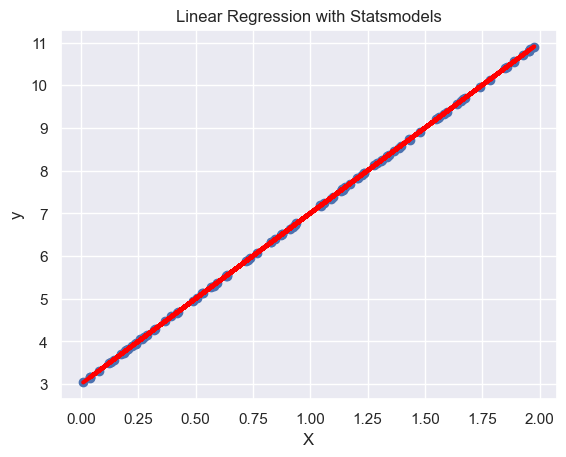

In [14]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
# adding noise to the dependent variable
y = 3 + 4 * X + 0.01*np.random.randn(100, 1)

# Add constant term for intercept in statsmodels
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

# Plotting the data and regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], model.predict(X), color='red', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Statsmodels')
plt.show()


The output of the `statsmodels` linear regression summary provides various statistical measures and information about the fitted model. Here's how to interpret some of the key components of the summary:

- Dependent Variable: Indicates the dependent variable used in the model.
- Model: The model type and method used (e.g., Ordinary Least Squares - OLS).
    - OLS aims to find the line (in the case of simple linear regression) or the plane/hyperplane (in multiple linear regression) that minimizes the sum of the squared differences between the observed and predicted values of the dependent variable. It does so by finding the coefficients for the independent variables that best fit the data by minimizing the sum of the squares of the vertical distances (residuals) between the observed data points and the predicted values from the regression line/plane.
- Method: The method used for estimating the parameters (e.g., Least Squares).
- Date and Time: When the model was fitted.
- Number of observations: The number of data points used in the model.

Coefficients Table:
-  coef: The estimated coefficients (slopes) for each independent variable.
- std err: The standard errors of the coefficients.
- t: The t-statistic value for testing the null hypothesis that the coefficient is zero.
    - The formula for the t-statistic is $t=\frac{coef}{std \ err}$
- P>|t|: The p-values associated with the t-statistics. These indicate the significance of each variable. Smaller p-values suggest more significance.
- [0.025, 0.975]: The 95% confidence intervals for the coefficients.

Model Fit Statistics:
- R-squared: The coefficient of determination, representing the proportion of variance explained by the model. Higher values closer to 1 indicate better fit.
- Adj. R-squared: R-squared adjusted for the number of predictors in the model.
    - The standard R-squared (R²) measures the proportion of variance in the dependent variable (target) explained by the independent variables in the model. However, as more predictors are added to the model, R-squared may tend to increase, even if the added variables do not significantly improve the model's explanatory power. This increase might happen due to overfitting, where the model fits the noise in the data rather than capturing the underlying relationships.
- F-statistic: The F-statistic for the overall significance of the model.
    -  A larger F-statistic with a small associated p-value (usually less than 0.05) indicates that the overall model is statistically significant. This suggests that the included predictors collectively have a significant impact on explaining the variation in the dependent variable.
- Prob (F-statistic): The p-value associated with the F-statistic.
- log-likelihood: It is not directly applicable in standard linear regression analyses based on Ordinary Least Squares. It becomes more relevant in models involving likelihood-based estimation techniques or other models where explicit probability distributions are specified for the dependent variable.
- AIC (Akaike Information Criterion): measure used to estimate the relative quality of statistical models. It seeks to balance the goodness of fit of the model with its simplicity or parsimony.
    - Lower AIC values indicate better-fitting models relative to higher AIC values. The model with the lowest AIC among competing models is generally preferred.
- BIC (Bayesian Information Criterion): similar to AIC, is used for model selection and balancing goodness of fit with model complexity.
    - lower BIC values indicate better-fitting models. BIC places a higher penalty on models with more parameters compared to AIC, favoring simpler models even more strongly.

Residuals:
-  Omnibus Test: is a statistical test used in regression analysis to evaluate the overall significance of a regression model by testing whether at least one of the independent variables significantly contributes to explaining the variance in the dependent variable.
    -  A significant result (small p-value, usually less than the chosen significance level, such as 0.05) from the Omnibus test indicates that at least one of the predictors contributes significantly to explaining the variance in the dependent variable. In other words, it suggests that the overall regression model is statistically significant.
- Skewness: Measure of the symmetry of the distribution of residuals around zero. residuals is the differences between observed and predicted values.
    - If the residuals are approximately normally distributed, the skewness should be close to zero, indicating symmetric distribution around the mean. However, significant departure from zero might suggest non-normality or the presence of outliers in the data.
- Kurtosis: a statistical measure that describes the peakedness or flatness of the distribution of a dataset, particularly with respect to the tails of the distribution. In the context of regression analysis, assessing the kurtosis of residuals helps in understanding the shape and characteristics of the distribution of the residuals.
    - A kurtosis value of 3 is often considered as the kurtosis of a normal distribution. Values greater than 3 indicate heavier tails (more peaked) than the normal distribution, while values less than 3 indicate lighter tails (less peaked) than the normal distribution.

Other Information:
- Autocorrelation of residuals: refers to the presence of a systematic pattern or correlation among the residuals (errors) of a regression model at different time points or observations. In simpler terms, it implies that the residuals are not independent and exhibit a predictable relationship with each other across the dataset.
- Durbin-Watson: Test for autocorrelation in the residuals (values between 0 and 4; closer to 2 suggests no autocorrelation).
- Jarque-Bera (JB) and Prob(JB): It evaluates whether the residuals (errors) from a regression analysis follow a normal distribution based on their skewness and kurtosis.
    - A low p-value (typically less than the chosen significance level, e.g., 0.05) suggests evidence against the null hypothesis, indicating that the residuals might not follow a normal distribution. Higher p-values indicate no significant departure from normality.
- Cond. No.: Condition number for multicollinearity diagnosis is a measure used in linear regression models to diagnose multicollinearity among the predictor variables. Multicollinearity occurs when there are high correlations among the independent variables in a regression model, leading to issues in the estimation of coefficients and the interpretation of the model.
    - A high Condition Number indicates multicollinearity issues, suggesting that the independent variables are highly correlated.

Interpreting:
1. Coefficient Significance: Look at the p-values (< 0.05 generally indicates significance). Significant coefficients suggest a stronger relationship with the dependent variable.
2. R-squared: Measures the goodness-of-fit. Higher values indicate a better fit, but be cautious of overfitting.
3. Residual Analysis: Check for normality, homoscedasticity, and independence of residuals.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     517.0
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           7.18e-41
Time:                        14:24:13   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2222      0.193     16.670      0.0

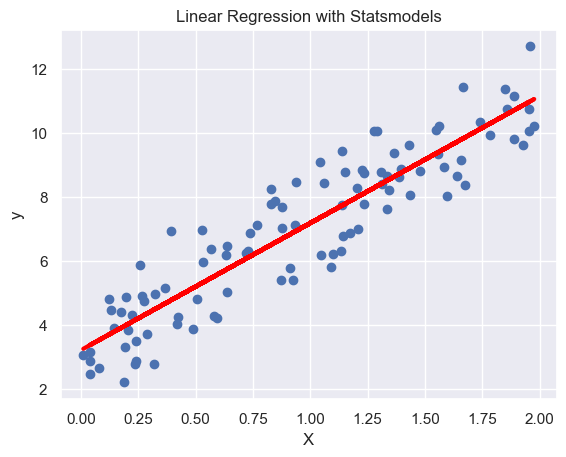

In [15]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)

# we usually have y from collected data, thus we don't know the intercept and the coefficient.
y = 3 + 4 * X + np.random.randn(100, 1)

# Add constant term for intercept in statsmodels
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

# Plotting the data and regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], model.predict(X), color='red', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Statsmodels')
plt.show()


> Using `scikit-learn`

Coefficients: [[3.93693502]]
Intercept: [3.44430215]
Mean Squared Error: 3.9697545948985935


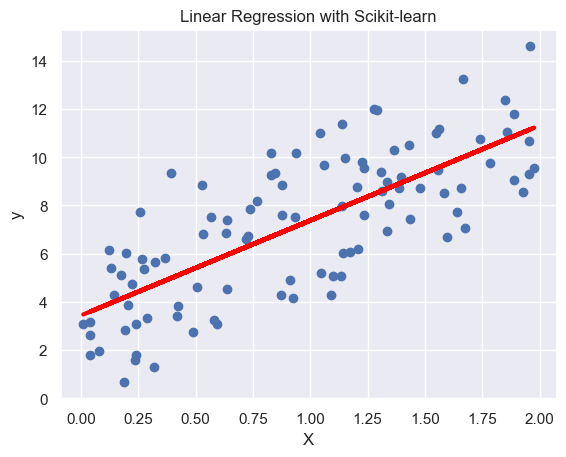

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + 2*np.random.randn(100, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Make predictions
predictions = model.predict(X)

# Calculate mean squared error
mse = mean_squared_error(y, predictions)
print('Mean Squared Error:', mse)

# Plotting the data and regression line
plt.scatter(X, y)
plt.plot(X, predictions, color='red', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Scikit-learn')
plt.show()


<div class="alert alert-block alert-danger">
<b>Exercise:</b> 

1. Is there a relationship between `petal_length` & `petal_width` of iris dataset? 
2. Can you predict the `petal_width` based on `petal_length`?

</div>

In [17]:
# Add constant term for intercept in statsmodels
X = sm.add_constant(iris["petal_length"])
y = iris["petal_width"]
# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           4.68e-86
Time:                        14:24:13   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131   

In [18]:
X

,const,petal_length
0,1.0,1.4
1,1.0,1.4
2,1.0,1.3
3,1.0,1.5
4,1.0,1.4
...,...,...
145,1.0,5.2
146,1.0,5.0
147,1.0,5.2
148,1.0,5.4


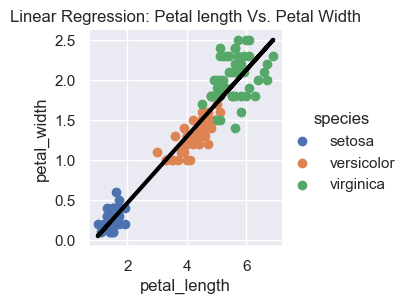

In [19]:
sns.FacetGrid(iris, hue="species").\
    map(plt.scatter, "petal_length", "petal_width").\
        add_legend()

# Plotting the data and regression line
#plt.scatter(X['petal_length'], y)
plt.plot(X['petal_length'], model.predict(X), color='black', linewidth=3)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Linear Regression: Petal length Vs. Petal Width')

plt.show()


In [20]:
model.predict([1, 10])

array([3.79447864])

In [21]:
model.params

const          -0.363076
petal_length    0.415755
dtype: float64

In [22]:
X['petal_length']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

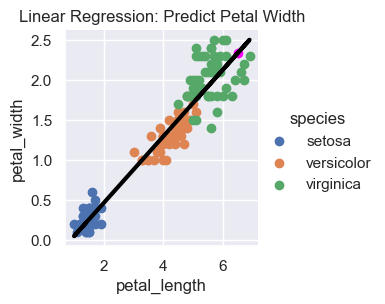

In [23]:
sns.FacetGrid(iris, hue="species").\
    map(plt.scatter, "petal_length", "petal_width").\
        add_legend()

# Plotting the data and regression line
#plt.scatter(X['petal_length'], y)
plt.plot(X['petal_length'], model.predict(X), color='black', linewidth=3)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Linear Regression: Predict Petal Width')

predict_x = 6.5
plt.scatter(predict_x , model.predict([1, predict_x ]),color='magenta')

plt.show()


<div class="alert alert-block alert-danger">
<b>Exercise:</b> Can you predict the `petal_length` based on `sepal_length`? Use a linear model regression, and explain how do it is. 

</div>

---


# Linear Multiple Regression


Linear regression can be extended to multiple independent variables, known as multiple linear regression. The equation for multiple linear regression is:

$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n $

Where:
- $ y $ is the dependent variable.
- $ x_1, x_2, \ldots, x_n $ are the independent variables.
- $ \beta_0 $ is the y-intercept.
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients (slopes) associated with each independent variable.

- Multiple linear regression allows the investigator to account for all of these potentially important factors in one model. 
- The advantages of this approach are that this may lead to a more accurate and precise understanding of the association of each individual factor with the outcome. 
- It also yields an understanding of the association of all the factors as a whole with the outcome, and the associations between the various predictor variables themselves.

**Addtion assumption to be met**: 
- No Multicollinearity; In multiple linear regression, the independent variables **should not be highly correlated** with each other. High multicollinearity can lead to issues in interpreting the coefficients and can affect the model's stability.
---

> toy example 1 :

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Sample data
data = {
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X2': [3, -4, 2, 5, 10, -6, 8, -3, 10, 14],
    'Y': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
}

# Creating a pandas DataFrame
df = pd.DataFrame(data)

# Independent variables (X) and dependent variable (Y)
X = df[['X1', 'X2']]
Y = df['Y']

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.075e+30
Date:                Fri, 05 Jan 2024   Prob (F-statistic):          1.57e-105
Time:                        14:24:14   Log-Likelihood:                 303.91
No. Observations:                  10   AIC:                            -601.8
Df Residuals:                       7   BIC:                            -600.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0000   1.26e-14   3.96e+14      0.0

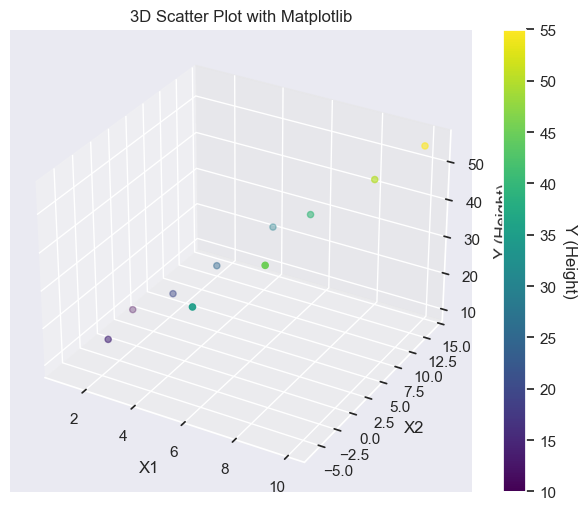

In [25]:
# Create a 3D scatter plot colored by 'Y' (height)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df['X1'], df['X2'], df['Y'], c=df['Y'], cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y (Height)')
ax.set_title('3D Scatter Plot with Matplotlib')

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Y (Height)', rotation=270, labelpad=15)

plt.show()

In [26]:
model.params

const    5.000000e+00
X1       5.000000e+00
X2      -1.110223e-16
dtype: float64

<div class="alert alert-block alert-warning">
<b>Elaborate the results:</b>  Does this multiple regression need X2 predictor in the model?
</div>

In [27]:
# New values of X1 and X2 for prediction
new_X1 = 5
new_X2 = 12

# Predict for the new values
new_data = sm.add_constant([[1, new_X1, new_X2]])  # Add a constant and prepare the new data correctly
predicted_Y = model.predict(new_data)

print(f"Predicted Y for X1={new_X1} and X2={new_X2}: {predicted_Y[0]}")


Predicted Y for X1=5 and X2=12: 30.000000000000007


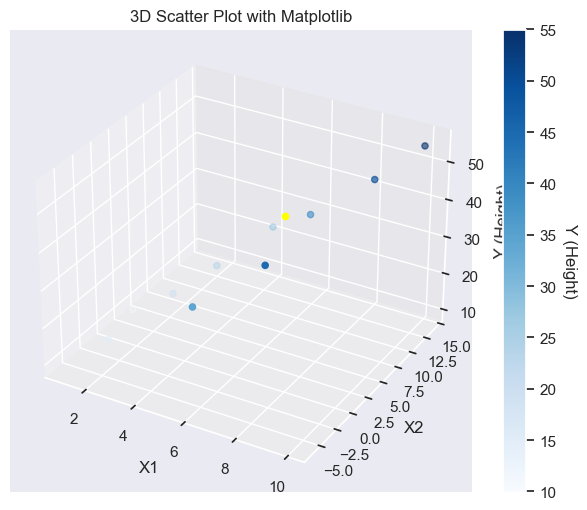

In [28]:
# Create a 3D scatter plot colored by 'Y' (height)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df['X1'], df['X2'], df['Y'], c=df['Y'], cmap='Blues')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y (Height)')
ax.set_title('3D Scatter Plot with Matplotlib')

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Y (Height)', rotation=270, labelpad=15)


# Scatter plot for predicted value

ax.scatter(new_X1, new_X2, predicted_Y, color='yellow')
plt.show()

In [29]:
import plotly.express as px

# Original scatter plot
fig = px.scatter_3d(df, x='X1', y='X2', z='Y', color='Y', color_discrete_sequence=['blue'])

# predicted scatter plot

new_point = px.scatter_3d(x=[new_X1], y=[new_X2], z=predicted_Y, color =[100] )
fig.add_trace(new_point.data[0])
# Update the marker style for the added point to 'box'
fig.update_traces()

fig.show()


- 1D: line
- 2D: plane 
- 3D: Hyperplane

> toy example 2 : strong multicollinearity problem.

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Sample data
data = {
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X2': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
    'Y': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
}

# Creating a pandas DataFrame
df = pd.DataFrame(data)

# Independent variables (X) and dependent variable (Y)
X = df[['X1', 'X2']]
Y = df['Y']

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.268e+31
Date:                Fri, 05 Jan 2024   Prob (F-statistic):          9.82e-124
Time:                        14:24:14   Log-Likelihood:                 311.59
No. Observations:                  10   AIC:                            -619.2
Df Residuals:                       8   BIC:                            -618.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0000   5.43e-15   9.21e+14      0.0

In [31]:
import plotly.express as px

# Original scatter plot
fig = px.scatter_3d(df, x='X1', y='X2', z='Y', color='Y', color_discrete_sequence=['red'])

fig.show()


<div class="alert alert-block alert-danger">
<b>Exercise:</b> 

1. Is there a relationship between water `petal_length` & `petal_width` of iris dataset? 
2. Can you predict the `petal_width` based on `petal_length`?
3. Construct your arguments based on your statistical and visualization outcome.

</div>

---

> More examples: Diamond dataset

- The term "carat" is a unit of measurement used to describe the weight of diamonds and other gemstones. One carat is equivalent to 200 milligrams or 0.2 grams.

In [32]:
# read csv using pandas
data = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/diamond.csv')

# check the head of dataframe
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [33]:
data[['Carat Weight', 'Price']].corr(method='kendall')


,Carat Weight,Price
Carat Weight,1.000000,0.765929
Price,0.765929,1.000000


<div class="alert alert-block alert-danger">
<b>Exercise:</b> Can you predict the `price` of the diamond based on `carat weight`?

</div>

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 1.682e+04
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:24:15   Log-Likelihood:                -59877.
No. Observations:                6000   AIC:                         1.198e+05
Df Residuals:                    5998   BIC:                         1.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.274e+04    200.801    -63.439   

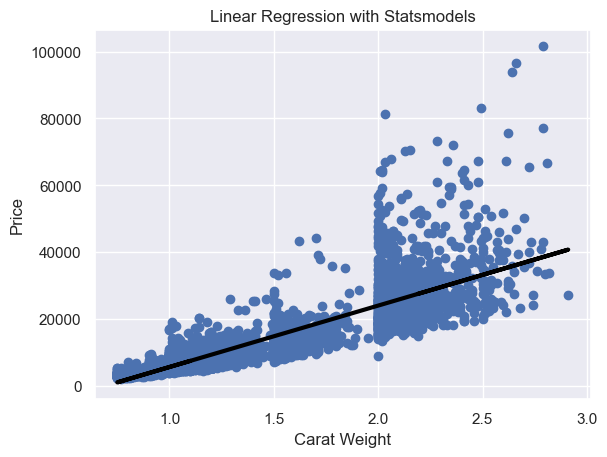

In [34]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = data['Carat Weight']
# we usually have y from collected data, thus we don't know the intercept and the coefficient.
y = data['Price']

# Add constant term for intercept in statsmodels
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

# Plotting the data and regression line
plt.scatter(X['Carat Weight'], y)
plt.plot(X['Carat Weight'], model.predict(X), color='black', linewidth=3)
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.title('Linear Regression with Statsmodels')
plt.show()

<div class="alert alert-block alert-warning">
<b> Info:</b>  
The carat weight of a diamond is a significant factor in determining its value and size. However, it's important to note that carat weight alone doesn't solely determine a diamond's worth. Other factors such as cut, color, and clarity also play crucial roles in evaluating a diamond's overall quality and value.
</div>

> Convert categorical dataset into orders: In data science, the process of mapping categorical or qualitative data (such as labels, categories, or text) to numerical representations is often referred to as "Encoding." This process is essential for machine learning algorithms that require numerical input because these algorithms typically cannot directly process categorical data.

- In regression, the goal is to predict a continuous numeric value (the dependent variable) based on one or more independent variables (features). While regression models work with numeric data, they might encounter categorical variables that need to be converted into numerical representations.

- Encoding categorical variables becomes essential when performing regression analysis involving features that are not inherently numeric. By converting categorical variables into numerical representations, regression models can handle these variables as part of the input features.

- **Ordinal Encoding**: maps categorical values to ordered integers. This might be suitable when the categorical variable has an inherent order or ranking.

In [35]:
data["Cut"].unique()

array(['Ideal', 'Very Good', 'Fair', 'Good', 'Signature-Ideal'],
      dtype=object)

> check the new variables' classes

In [36]:
data['Cut'].value_counts()

Cut
Ideal              2482
Very Good          2428
Good                708
Signature-Ideal     253
Fair                129
Name: count, dtype: int64

<Axes: xlabel='Cut', ylabel='Price'>

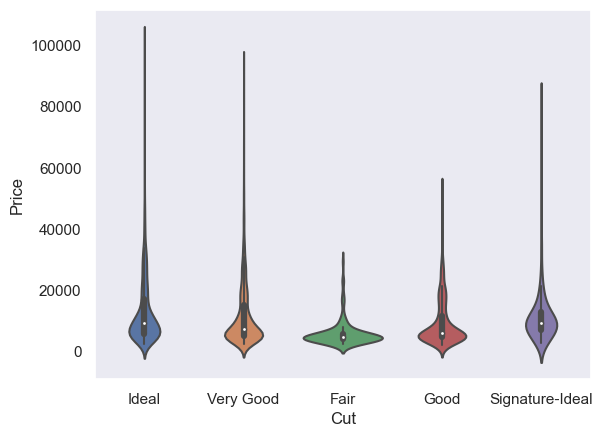

In [37]:
import seaborn as sns
sns.set_theme(style="dark")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=data, x="Cut", y="Price", fill=True)

1. Price, doesn't really relate to type of cut, but it has a 'rough' ranking (lowest to highest max price): {fair,good, signature-Ideal, Very Good, Ideal}
2. all are skewed classes with outliers. 

In [38]:

# Mapping diamond qualities to integers using a dictionary
quality_to_int = {
    'Ideal': 5,
    'Very Good': 4,
    'Signature-Ideal': 3,
    'Good': 2,
    'Fair': 1,
}

# Applying map function to the DataFrame column
data['Mapped Cut'] = data['Cut'].map(quality_to_int)

new_quantified_diamond_data = data[['Carat Weight', 'Mapped Cut', 'Price']]
new_quantified_diamond_data.sample(10)

,Carat Weight,Mapped Cut,Price
5811,1.67,5,13737
5786,1.06,4,5691
4914,0.77,3,3108
2724,1.01,4,5220
1086,0.75,4,3005
1571,1.81,5,24561
502,2.00,5,26049
735,0.75,1,2967
5886,1.02,4,4875
472,0.75,5,2523


<div class="alert alert-block alert-danger">
<b>Exercise:</b> Now predict the `price` of the diamond based on `Carat Weight` and `Mapped Cut`? Does the model gets better? Explain.

</div>

>Check correlation:

<Axes: >

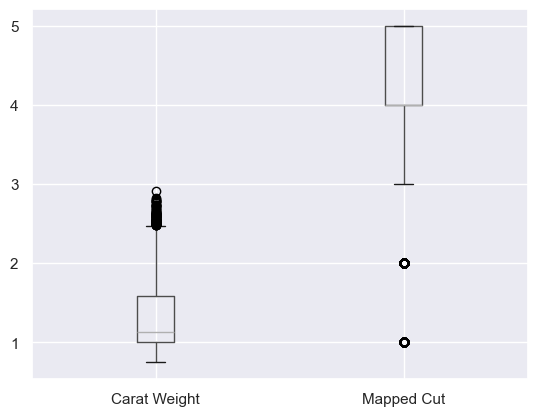

In [39]:
data[['Carat Weight', 'Mapped Cut']].boxplot()

Mapped Cut is a skewed variable as compared to Carrat Weight.

In [40]:
corr_matrix = new_quantified_diamond_data.corr()
corr_matrix

,Carat Weight,Mapped Cut,Price
Carat Weight,1.000000,0.116377,0.858562
Mapped Cut,0.116377,1.000000,0.141804
Price,0.858562,0.141804,1.000000


1. Good sign: Carat weight is not related to Mapped Cut. (there won't be multicollinearity problem between this two independent variable)
2. Warning: Mapped Cut is not related to Price!

In [41]:

# Creating a pandas DataFrame
df = pd.DataFrame(new_quantified_diamond_data)

# Independent variables (X) and dependent variable (Y)
X = df[['Carat Weight', 'Mapped Cut']]
Y = df['Price']

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     8486.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:24:15   Log-Likelihood:                -59856.
No. Observations:                6000   AIC:                         1.197e+05
Df Residuals:                    5997   BIC:                         1.197e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.426e+04    311.413    -45.803   

> Inference from the multiple regression model:
1. Very little increase R-squared:0.739, slightly better than the previous simple regression model; R-squared:0.737.
2. new variable (Mapped cut) is significant in this model where $\beta_2=409.2708$, pvalue 0.00 < 0.05.

---

# Bonus: Using Seaborn for Regression Visualization
- https://seaborn.pydata.org/examples/

In [42]:
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

> using `statsmodels` for regression plot

In [43]:

# Independent variables (X) and dependent variable (Y)
X = x
Y = y

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     63.49
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.62e-11
Time:                        14:24:15   Log-Likelihood:                -147.27
No. Observations:                  75   AIC:                             298.5
Df Residuals:                      73   BIC:                             303.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8831      0.421      4.476      0.0

> directly using `scipy` for regression function

In [44]:
from scipy.stats import linregress

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Calculate linear regression statistics
slope, intercept, r_value, p_value, std_err = linregress(x, y)


# Calculate R-squared
r_squared = r_value**2

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


Slope: 1.5096112468276752
Intercept: 1.88308827299269
R-squared: 0.4651503268113978
P-value: 1.618176638343328e-11
Standard Error: 0.18946233911866664


> directly using seaborn for regression plot

Text(0.5, 9, 'R-squared: 0.47')

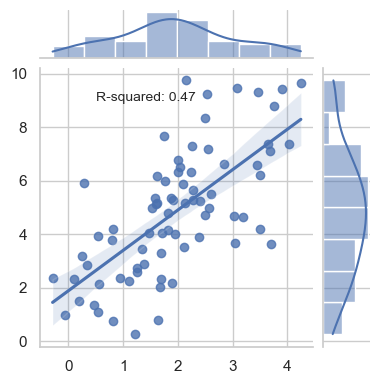

In [45]:
g = sns.jointplot(x=x, y=y, 
                  kind="reg", truncate=True,
                  color="b", height=4)
# Display R-squared value
r_squared = r_value**2
plt.text(0.5, 9, f'R-squared: {r_squared:.2f}',  fontsize=10)


> In Seaborn's residplot, lowess stands for Locally Weighted Scatterplot Smoothing. 

- It is a method used to create a smooth line that shows the relationship between two variables, typically the relationship **between the predictor variable and the residual (difference between observed and predicted values)** in a regression analysis.

- Adding a LOWESS curve can help reveal or emphasize structure

<Axes: >

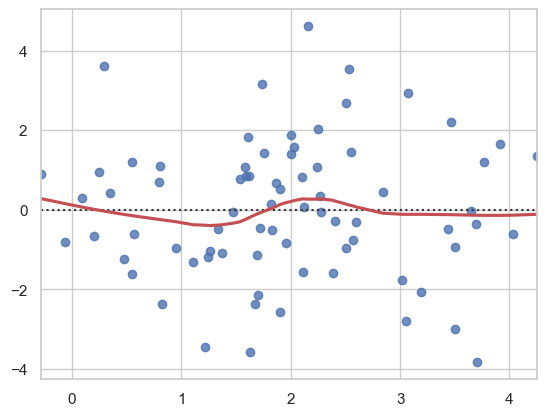

In [46]:
# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="b", line_kws=dict(color="r"))

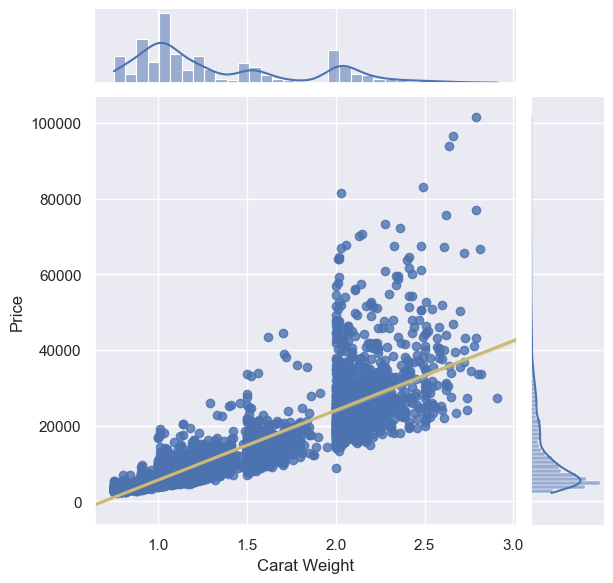

In [47]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x='Carat Weight', y='Price', data=data,
                  kind="reg", truncate=False,
                   line_kws=dict(color="y") )

<Axes: xlabel='Carat Weight', ylabel='Price'>

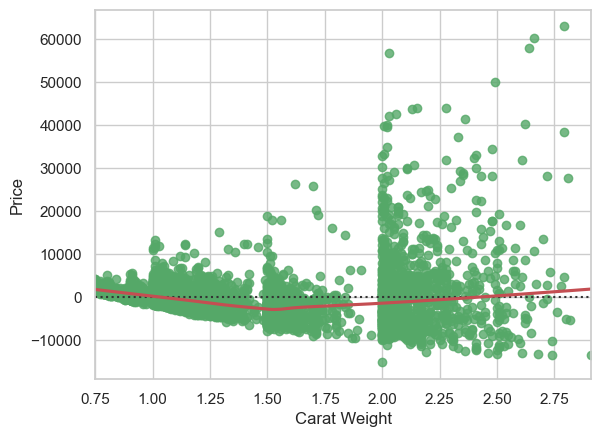

In [48]:
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

# Model setting Price ~ Carat Weight
x=data['Carat Weight']
y=data['Price']

# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="g",line_kws=dict(color="r"))

> using `tips` dataset

In [49]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
122,14.26,2.50,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
117,10.65,1.50,Female,No,Thur,Lunch,2
166,20.76,2.24,Male,No,Sun,Dinner,2
209,12.76,2.23,Female,Yes,Sat,Dinner,2
171,15.81,3.16,Male,Yes,Sat,Dinner,2
226,10.09,2.00,Female,Yes,Fri,Lunch,2
149,7.51,2.00,Male,No,Thur,Lunch,2
184,40.55,3.00,Male,Yes,Sun,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2


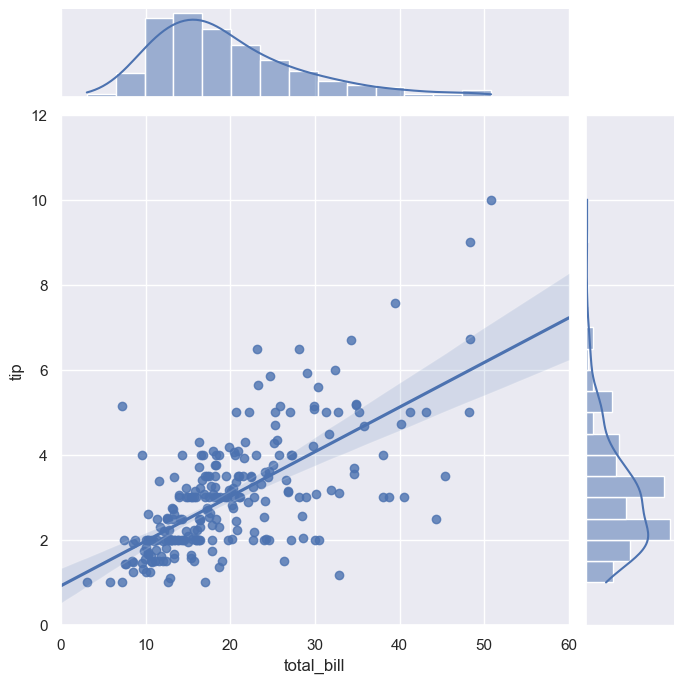

In [50]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="b", height=7)

<Axes: xlabel='total_bill', ylabel='tip'>

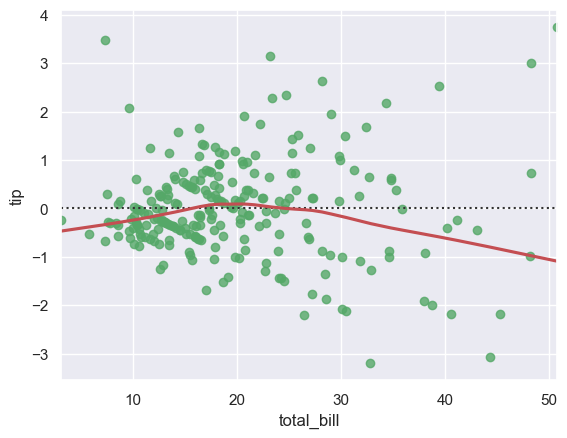

In [51]:
# Make an example dataset with y ~ x
x=tips["total_bill"]
y=tips["tip"]
# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="g",line_kws=dict(color="r"))